**retail_sales_predection(guvi_final_project)**

# The Task
Predict the department-wide sales for each store for the following year

Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact


importing necessary pacages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime import datetime

reading the csv file in pandas DataFrame

In [6]:
features_df=pd.read_csv("Features_data_set.csv")
sales_df=pd.read_csv("sales_data_set.csv")
stores_df=pd.read_csv("stores_data_set.csv")

checking for the concised summary using  .info() function

In [7]:
print(features_df.info())
print("=====================================================================================")
print(sales_df.info())
print("=====================================================================================")
print(stores_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store     

merging the features_df and stores_df

In [8]:
df1=pd.merge(features_df,stores_df,on='Store',how='inner')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 839.9+ KB


merging stores and sales df

In [10]:
df2=pd.merge(sales_df,stores_df,on='Store',how='inner')

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 19.7+ MB


In [12]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [13]:
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


converting the data type

In [14]:
df1.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

converting to date format

In [15]:
df2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size'], dtype='object')

In [16]:
df1["Date"]=df1["Date"].apply(lambda x: x.replace("/","-"))
df1["Date"]

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
8185    28-06-2013
8186    05-07-2013
8187    12-07-2013
8188    19-07-2013
8189    26-07-2013
Name: Date, Length: 8190, dtype: object

In [17]:
df1["Date"]= pd.to_datetime(df1["Date"],format="%d-%m-%Y",errors="coerce")
df1["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
8185   2013-06-28
8186   2013-07-05
8187   2013-07-12
8188   2013-07-19
8189   2013-07-26
Name: Date, Length: 8190, dtype: datetime64[ns]

In [18]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,8190.0,23.0,1.0,12.0,23.0,34.0,45.0,12.987966
Date,8190,2011-10-31 12:00:00,2010-02-05 00:00:00,2010-12-17 00:00:00,2011-10-31 12:00:00,2012-09-14 00:00:00,2013-07-26 00:00:00,NaN
Temperature,8190.0,59.356198,-7.29,45.9025,60.71,73.88,101.95,18.678607
Fuel_Price,8190.0,3.405992,2.472,3.041,3.513,3.743,4.468,0.431337
MarkDown1,4032.0,7032.371786,-2781.45,1577.5325,4743.58,8923.31,103184.98,9262.747448
MarkDown2,2921.0,3384.176594,-265.76,68.88,364.57,2153.35,104519.54,8793.583016
MarkDown3,3613.0,1760.10018,-179.26,6.6,36.26,163.15,149483.31,11276.462208
MarkDown4,3464.0,3292.935886,0.22,304.6875,1176.425,3310.0075,67474.85,6792.329861
MarkDown5,4050.0,4132.216422,-185.17,1440.8275,2727.135,4832.555,771448.1,13086.690278
CPI,7605.0,172.460809,126.064,132.364839,182.764003,213.932412,228.976456,39.738346


In [19]:
df2["Date"]=df2["Date"].apply(lambda x: x.replace("/","-"))
df2["Date"]

0         05-02-2010
1         12-02-2010
2         19-02-2010
3         26-02-2010
4         05-03-2010
             ...    
421565    28-09-2012
421566    05-10-2012
421567    12-10-2012
421568    19-10-2012
421569    26-10-2012
Name: Date, Length: 421570, dtype: object

In [20]:
df2["Date"]= pd.to_datetime(df2["Date"],format="%d-%m-%Y",errors="coerce")
df2["Date"]

0        2010-02-05
1        2010-02-12
2        2010-02-19
3        2010-02-26
4        2010-03-05
            ...    
421565   2012-09-28
421566   2012-10-05
421567   2012-10-12
421568   2012-10-19
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [21]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Size,421570.0,136727.915739,34875.0,93638.0,140167.0,202505.0,219622.0,60980.583328


df1 have date from 2010-2013
df2 have date from 2010-2012
so seperating the dataFrame

creating new column using the common features by combaining them for merging

In [22]:
df1["differ"]=df1["Store"].astype(str)+"-"+df1["Date"].astype(str)
df2["differ"]=df2["Store"].astype(str)+"-"+df2["Date"].astype(str)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
 14  differ        8190 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   differ        421570 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 22.9+ MB


In [25]:
df1_inlist=df1[df1['differ'] .isin( df2['differ'])]
df1_inlist.reset_index(drop=True,inplace=True)
df1_inlist.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,differ
6430,45,2012-09-28,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221,45-2012-09-28
6431,45,2012-10-05,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221,45-2012-10-05
6432,45,2012-10-12,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221,45-2012-10-12
6433,45,2012-10-19,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221,45-2012-10-19
6434,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,45-2012-10-26


In [26]:
df1_not_in_list=df1[~df1['differ'].isin(df2['differ'])]
df1_not_in_list.reset_index(drop=True,inplace=True)
df1_not_in_list.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,differ
1750,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,45-2013-06-28
1751,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,45-2013-07-05
1752,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,45-2013-07-12
1753,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,45-2013-07-19
1754,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,45-2013-07-26


In [27]:
df1.shape,df1_inlist.shape,df1_not_in_list.shape

((8190, 15), (6435, 15), (1755, 15))

In [28]:
df3=pd.merge(df2,df1_inlist,on='differ',how='inner')

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store_x       421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date_x        421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type_x        421570 non-null  object        
 6   Size_x        421570 non-null  int64         
 7   differ        421570 non-null  object        
 8   Store_y       421570 non-null  int64         
 9   Date_y        421570 non-null  datetime64[ns]
 10  Temperature   421570 non-null  float64       
 11  Fuel_Price    421570 non-null  float64       
 12  MarkDown1     150681 non-null  float64       
 13  MarkDown2     111248 non-null  float64       
 14  MarkDown3     137091 non-null  float64       
 15  MarkDown4     134

In [30]:
df3.columns

Index(['Store_x', 'Dept', 'Date_x', 'Weekly_Sales', 'IsHoliday_x', 'Type_x',
       'Size_x', 'differ', 'Store_y', 'Date_y', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_y', 'Type_y', 'Size_y'],
      dtype='object')

dropping the unwanted columns

In [31]:
df3.drop(columns=['Store_x','Date_x','IsHoliday_x','Type_x','Size_x'],inplace=True)

renaming the columns

In [32]:
df3.rename(columns={'Store_y':'Store','Date_y':'Date','IsHoliday_y':'IsHoliday','Type_y':'Type','Size_y':'Size'},inplace=True)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Dept          421570 non-null  int64         
 1   Weekly_Sales  421570 non-null  float64       
 2   differ        421570 non-null  object        
 3   Store         421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday     421570 non-null  bool          
 15  Type          421

In [34]:
df1_not_in_list['Date'].unique()

<DatetimeArray>
['2012-11-02 00:00:00', '2012-11-09 00:00:00', '2012-11-16 00:00:00',
 '2012-11-23 00:00:00', '2012-11-30 00:00:00', '2012-12-07 00:00:00',
 '2012-12-14 00:00:00', '2012-12-21 00:00:00', '2012-12-28 00:00:00',
 '2013-01-04 00:00:00', '2013-01-11 00:00:00', '2013-01-18 00:00:00',
 '2013-01-25 00:00:00', '2013-02-01 00:00:00', '2013-02-08 00:00:00',
 '2013-02-15 00:00:00', '2013-02-22 00:00:00', '2013-03-01 00:00:00',
 '2013-03-08 00:00:00', '2013-03-15 00:00:00', '2013-03-22 00:00:00',
 '2013-03-29 00:00:00', '2013-04-05 00:00:00', '2013-04-12 00:00:00',
 '2013-04-19 00:00:00', '2013-04-26 00:00:00', '2013-05-03 00:00:00',
 '2013-05-10 00:00:00', '2013-05-17 00:00:00', '2013-05-24 00:00:00',
 '2013-05-31 00:00:00', '2013-06-07 00:00:00', '2013-06-14 00:00:00',
 '2013-06-21 00:00:00', '2013-06-28 00:00:00', '2013-07-05 00:00:00',
 '2013-07-12 00:00:00', '2013-07-19 00:00:00', '2013-07-26 00:00:00']
Length: 39, dtype: datetime64[ns]

In [35]:
sd=sales_df[['Store','Dept']]

In [36]:
sd

,Store,Dept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
421565,45,98
421566,45,98
421567,45,98
421568,45,98


In [37]:
sd.drop_duplicates(subset=["Store","Dept"],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10724\3942184428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd.drop_duplicates(subset=["Store","Dept"],inplace=True)


In [38]:
sd.reset_index(drop=True,inplace=True)
sd

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [39]:
df1_not_in_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         1755 non-null   int64         
 1   Date          1755 non-null   datetime64[ns]
 2   Temperature   1755 non-null   float64       
 3   Fuel_Price    1755 non-null   float64       
 4   MarkDown1     1752 non-null   float64       
 5   MarkDown2     1284 non-null   float64       
 6   MarkDown3     1567 non-null   float64       
 7   MarkDown4     1499 non-null   float64       
 8   MarkDown5     1755 non-null   float64       
 9   CPI           1170 non-null   float64       
 10  Unemployment  1170 non-null   float64       
 11  IsHoliday     1755 non-null   bool          
 12  Type          1755 non-null   object        
 13  Size          1755 non-null   int64         
 14  differ        1755 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64

In [40]:
df4=pd.merge(df1_not_in_list,sd,on='Store',how='inner')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129909 entries, 0 to 129908
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         129909 non-null  int64         
 1   Date          129909 non-null  datetime64[ns]
 2   Temperature   129909 non-null  float64       
 3   Fuel_Price    129909 non-null  float64       
 4   MarkDown1     129724 non-null  float64       
 5   MarkDown2     96649 non-null   float64       
 6   MarkDown3     117528 non-null  float64       
 7   MarkDown4     113682 non-null  float64       
 8   MarkDown5     129909 non-null  float64       
 9   CPI           86606 non-null   float64       
 10  Unemployment  86606 non-null   float64       
 11  IsHoliday     129909 non-null  bool          
 12  Type          129909 non-null  object        
 13  Size          129909 non-null  int64         
 14  differ        129909 non-null  object        
 15  Dept          129

In [41]:
df4.head(17)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,differ,Dept
0,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,1
1,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,2
2,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,3
3,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,4
4,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,5
5,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,6
6,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,7
7,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,8
8,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,9
9,1,2012-11-02,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,False,A,151315,1-2012-11-02,10


In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Dept          421570 non-null  int64         
 1   Weekly_Sales  421570 non-null  float64       
 2   differ        421570 non-null  object        
 3   Store         421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday     421570 non-null  bool          
 15  Type          421

In [43]:
df5=pd.concat([df3,df4])
df5.reset_index(drop=True,inplace=True)
df5

,Dept,Weekly_Sales,differ,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,24924.50,1-2010-02-05,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,46039.49,1-2010-02-12,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,41595.55,1-2010-02-19,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,19403.54,1-2010-02-26,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,21827.90,1-2010-03-05,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,94,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221
551475,95,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221
551476,96,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221
551477,97,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221


In [44]:
df5.isnull().sum()

Dept                 0
Weekly_Sales    129909
differ               0
Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
IsHoliday            0
Type                 0
Size                 0
dtype: int64

In [45]:
df5['day']=df5['Date'].dt.day
df5['month']=df5['Date'].dt.month
df5['year']=df5['Date'].dt.year
df5

,Dept,Weekly_Sales,differ,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,day,month,year
0,1,24924.50,1-2010-02-05,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2,2010
1,1,46039.49,1-2010-02-12,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,12,2,2010
2,1,41595.55,1-2010-02-19,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,19,2,2010
3,1,19403.54,1-2010-02-26,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,26,2,2010
4,1,21827.90,1-2010-03-05,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,94,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,26,7,2013
551475,95,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,26,7,2013
551476,96,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,26,7,2013
551477,97,NaN,45-2013-07-26,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,26,7,2013


In [46]:
df5.drop(columns='Date',axis=1,inplace=True)

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Dept          551479 non-null  int64  
 1   Weekly_Sales  421570 non-null  float64
 2   differ        551479 non-null  object 
 3   Store         551479 non-null  int64  
 4   Temperature   551479 non-null  float64
 5   Fuel_Price    551479 non-null  float64
 6   MarkDown1     280405 non-null  float64
 7   MarkDown2     207897 non-null  float64
 8   MarkDown3     254619 non-null  float64
 9   MarkDown4     248649 non-null  float64
 10  MarkDown5     281341 non-null  float64
 11  CPI           508176 non-null  float64
 12  Unemployment  508176 non-null  float64
 13  IsHoliday     551479 non-null  bool   
 14  Type          551479 non-null  object 
 15  Size          551479 non-null  int64  
 16  day           551479 non-null  int32  
 17  month         551479 non-null  int32  
 18  year

converting the catogrical columns to numerical 

In [48]:
df5['IsHoliday'].unique()

array([False,  True])

In [49]:
df5["IsHoliday"]= df5["IsHoliday"].map({False:0, True:1})

In [50]:
df5['IsHoliday'].unique()

array([0, 1])

In [51]:
df5['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [52]:
df5['Type']=df5['Type'].map({'A':1,'B':2,'C':3})

In [53]:
df5['Type'].unique()

array([1, 2, 3])

In [54]:
df5.sort_values(by=['day','month','year',"Store","Dept"])
df5.reset_index(drop=True,inplace=True)

In [55]:
df5=df5[['day','month','year','Store','Dept','Type','Weekly_Sales','Size','IsHoliday','Temperature',
           'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]

In [56]:
df5

,day,month,year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,12,2,2010,1,1,1,46039.49,151315,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,19,2,2010,1,1,1,41595.55,151315,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,26,2,2010,1,1,1,19403.54,151315,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,5,3,2010,1,1,1,21827.90,151315,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [57]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day           551479 non-null  int32  
 1   month         551479 non-null  int32  
 2   year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Weekly_Sales  421570 non-null  float64
 7   Size          551479 non-null  int64  
 8   IsHoliday     551479 non-null  int64  
 9   Temperature   551479 non-null  float64
 10  Fuel_Price    551479 non-null  float64
 11  MarkDown1     280405 non-null  float64
 12  MarkDown2     207897 non-null  float64
 13  MarkDown3     254619 non-null  float64
 14  MarkDown4     248649 non-null  float64
 15  MarkDown5     281341 non-null  float64
 16  CPI           508176 non-null  float64
 17  Unemployment  508176 non-null  float64
dtypes: f

In [58]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
day,551479.0,15.653488,8.776044,1.000,8.000000,16.000000,23.000000,31.000000
month,551479.0,6.277180,3.340134,1.000,3.000000,6.000000,9.000000,12.000000
year,551479.0,2011.392758,1.054086,2010.000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000,1.000000,1.000000,2.000000,3.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.030000,20205.852500,693099.360000
Size,551479.0,136073.691863,61207.331445,34875.000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290,45.160000,59.940000,73.160000,101.950000


In [59]:
df5['Weekly_Sales']=df5['Weekly_Sales'].apply(lambda x:np.nan if x<=0 else x)

C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1140945006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Weekly_Sales']=df5['Weekly_Sales'].apply(lambda x:np.nan if x<=0 else x)


In [60]:
df5.isnull().sum()

day                  0
month                0
year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
dtype: int64

creating new column (MarkDown)

The code creates a new boolean column 'MarkDown' in the DataFrame df5. This column indicates whether any of the columns 'MarkDown1', 'MarkDown2', ..., 'MarkDown5' contain a non-null value for each row.

In [61]:
df5['MarkDown']=df5[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1)

In [62]:
df5['MarkDown'].unique()

array([False,  True])

In [63]:
df5['MarkDown']=df5['MarkDown'].map({False:0,True:1})

In [64]:
df5_corr=df5.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']).corr()

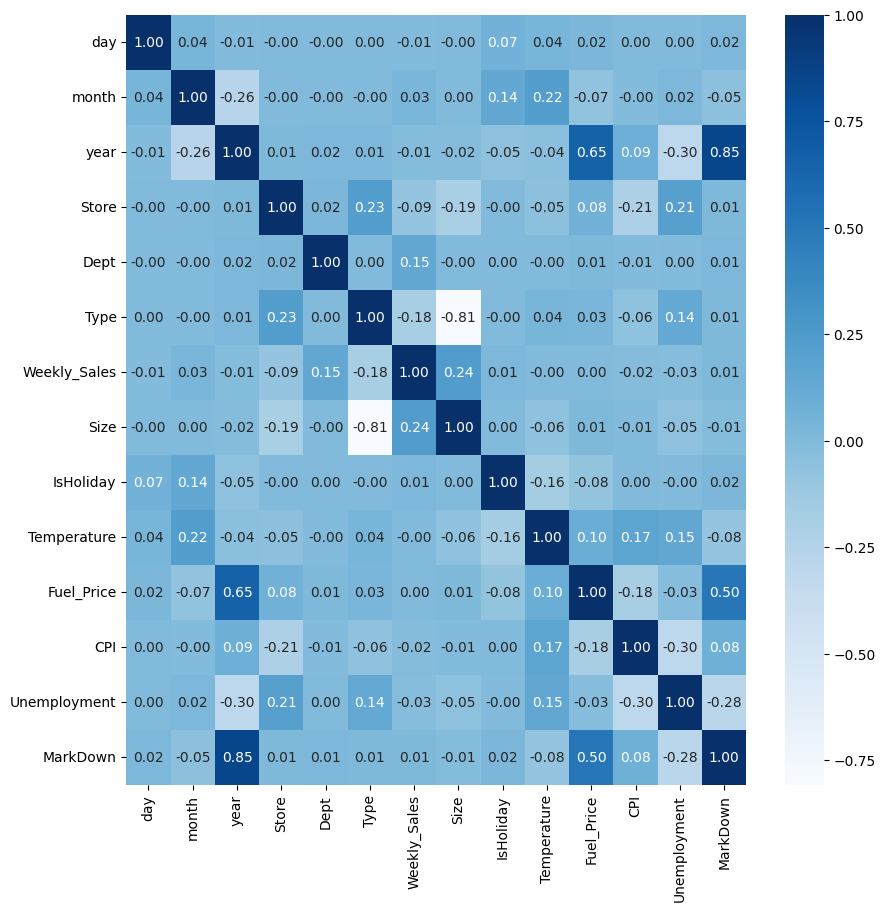

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(df5_corr,annot=True,cmap="Blues",fmt=".2f")
plt.show()

filling the null values using ml

In [66]:
#importing the ML packages for the model selection

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pickle

In [67]:
df5['diff']=df5['day'].astype(str)+"-"+df5['month'].astype(str)+"-"+df5['year'].astype(str)+"-"+df5['Store'].astype(str)+"-"+df5['Dept'].astype(str)

In [68]:
df_model1=df5.copy()
df_model1.drop(columns=["MarkDown"],inplace=True)

df_model1.isnull().sum()

day                  0
month                0
year                 0
Store                0
Dept                 0
Type                 0
Weekly_Sales    131267
Size                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271074
MarkDown2       343582
MarkDown3       296860
MarkDown4       302830
MarkDown5       270138
CPI              43303
Unemployment     43303
diff                 0
dtype: int64

In [69]:
#function for the checking the accurcy score(r2_score)
def accuracy_score(x_train,x_test,y_train,y_test,algorithm):
    model=algorithm().fit(x_train,y_train)
    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    r2_score_train=r2_score(y_pred_train,y_train)
    r2_score_test= r2_score(y_pred_test,y_test)

    accuracy={"algorithm":algorithm,
              "R2_train":r2_score_train,
              "R2_test":r2_score_test}
    
    return accuracy

In [70]:
def model(df,null_columns,lable):
    df1=df.drop(columns=null_columns)

    

    df_not_null=df1[df1[lable].notnull()]
    df_not_null.reset_index(drop=True,inplace=True)

    x=df_not_null.drop(columns=[lable,'diff'])
    y=df_not_null[lable]

    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

    #checking the ML models
    print(accuracy_score(x_train,x_test,y_train,y_test,DecisionTreeRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,RandomForestRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,AdaBoostRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,ExtraTreesRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,GradientBoostingRegressor))
 


In [67]:
df_model1.columns

Index(['day', 'month', 'year', 'Store', 'Dept', 'Type', 'Weekly_Sales', 'Size',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'diff'],
      dtype='object')

In [ ]:
model(df_model1,['MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],'Weekly_Sales')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9596284919582606}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 0.9966718059484635, 'R2_test': 0.9759642240496217}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': -0.9234068164070008, 'R2_test': -0.9717754442782229}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 0.9999999998643497, 'R2_test': 0.979179858629806}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.4953106699413148, 'R2_test': 0.49788625420642085}


In [ ]:
model(df_model1,['Weekly_Sales', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],'MarkDown1')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.08919039509366522, 'R2_test': 0.08330426641373678}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999999811022897}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.5277374449017047, 'R2_test': 0.5183453459576447}


In [ ]:
model(df_model1,['Weekly_Sales', 'MarkDown1',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],'MarkDown2')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.314059666225625, 'R2_test': 0.2993183646263099}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999999850669095}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.8089208079459429, 'R2_test': 0.8144988253555041}


In [ ]:
model(df_model1,['Weekly_Sales', 'MarkDown1',
       'MarkDown2', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],'MarkDown3')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 0.9999999999982493, 'R2_test': 0.9999999999884894}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.8853529870216502, 'R2_test': 0.8822410187400597}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999999999971179}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.9046115951319924, 'R2_test': 0.8995463256440182}


In [ ]:
model(df_model1,['Weekly_Sales', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown5', 'CPI', 'Unemployment'],'MarkDown4')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 0.9999999999982779, 'R2_test': 0.9999999999778131}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.3931117227188373, 'R2_test': 0.3746772619964366}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999999429748114}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.6712770330706443, 'R2_test': 0.6742184678676189}


In [84]:
model(df_model1,['Weekly_Sales', 'MarkDown1',
       'MarkDown3', 'MarkDown4', 'MarkDown2', 'CPI', 'Unemployment'],'MarkDown5')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.6014807759002081, 'R2_test': 0.6633251288204305}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999999981927381}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.7633133954512056, 'R2_test': 0.787007705652015}


In [85]:
model(df_model1,['Weekly_Sales', 'MarkDown1','MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5',  'Unemployment'],'CPI')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': -0.7479332335204438, 'R2_test': -0.732779708955098}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999999999998964}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.9859762591094181, 'R2_test': 0.9858986365875411}


In [86]:
model(df_model1,['Weekly_Sales', 'MarkDown1','MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI'],'Unemployment')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.1588392846283917, 'R2_test': 0.1482045395846997}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 1.0}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.9245662961958483, 'R2_test': 0.9233343962532097}


random_forest_regressor's perfomance is overall good 

In [ ]:
df_model1

,day,month,year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5-2-2010-1-1
1,12,2,2010,1,1,1,46039.49,151315,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,12-2-2010-1-1
2,19,2,2010,1,1,1,41595.55,151315,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,19-2-2010-1-1
3,26,2,2010,1,1,1,19403.54,151315,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,26-2-2010-1-1
4,5,3,2010,1,1,1,21827.90,151315,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,5-3-2010-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26-7-2013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26-7-2013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26-7-2013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,26-7-2013-45-97


In [71]:
#RandomForestRegressor model

def RandomForest(df,null_columns,lable):
    #removing null columns
    df1=df.drop(columns=null_columns)

    #seperating the null and nonNull 
    df_null=df1[df1[lable].isnull()]
    df_null.reset_index(drop=True,inplace=True)

    df_non_null=df1[df1[lable].notnull()]
    df_non_null.reset_index(drop=True,inplace=True)

    x=df_non_null.drop(columns=[lable,'diff'])
    y=df_non_null[lable]

    #spliting training and test data
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    model=RandomForestRegressor().fit(x_train,y_train)   
    y_pred=model.predict(x_test)

    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_pred,y_test)

    metrics={'mean_squared_error':mse,
             'rout_mean_square_error':rmse,
             'mean_absolute_error':mae,
             'r2_score':r2}  
    print(metrics)

    data=df_null.drop(columns=[lable,'diff'],axis=1)
    y_pred_null=model.predict(data)

    df_null[lable]=pd.DataFrame(y_pred_null)
    df_result=pd.concat([df_null,df_non_null],axis=0,ignore_index=True)

    return df_result    

In [72]:
df_model1.columns

Index(['day', 'month', 'year', 'Store', 'Dept', 'Type', 'Weekly_Sales', 'Size',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'diff'],
      dtype='object')

In [73]:
df5_m1_md1=RandomForest(df_model1,['Weekly_Sales','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],'MarkDown1')

{'mean_squared_error': 3.0320739355622656e-22, 'rout_mean_square_error': np.float64(1.741285139074662e-11), 'mean_absolute_error': 9.106923116295318e-12, 'r2_score': 1.0}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [74]:
df5_m1_md2=RandomForest(df_model1,['Weekly_Sales','MarkDown1','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],'MarkDown2')

{'mean_squared_error': 1.6726230415676985e-22, 'rout_mean_square_error': np.float64(1.293299285381268e-11), 'mean_absolute_error': 4.106779300713246e-12, 'r2_score': 1.0}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [75]:
df5_m1_md3=RandomForest(df_model1,['Weekly_Sales','MarkDown1','MarkDown2','MarkDown4','MarkDown5','CPI','Unemployment'],'MarkDown3')

{'mean_squared_error': 0.0021360686387556565, 'rout_mean_square_error': np.float64(0.04621762259956322), 'mean_absolute_error': 0.0013600070715870354, 'r2_score': 0.9999999999842984}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [76]:
df5_m1_md4=RandomForest(df_model1,['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown5','CPI','Unemployment'],'MarkDown4')

{'mean_squared_error': 1.1018221144397284e-22, 'rout_mean_square_error': np.float64(1.0496771477172057e-11), 'mean_absolute_error': 4.064372640307852e-12, 'r2_score': 1.0}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [77]:
df5_m1_md5=RandomForest(df_model1,['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','CPI','Unemployment'],'MarkDown5')

{'mean_squared_error': 7.105780161766212e-23, 'rout_mean_square_error': np.float64(8.429578970367508e-12), 'mean_absolute_error': 4.875632902560214e-12, 'r2_score': 1.0}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [78]:
df_model1.columns


Index(['day', 'month', 'year', 'Store', 'Dept', 'Type', 'Weekly_Sales', 'Size',
       'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'diff'],
      dtype='object')

In [79]:
df_md1=df_model1.drop(columns=['MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5'],axis=1)

In [80]:
df_md1

,day,month,year,Store,Dept,Type,Weekly_Sales,Size,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,diff
0,5,2,2010,1,1,1,24924.50,151315,0,42.31,2.572,211.096358,8.106,5-2-2010-1-1
1,12,2,2010,1,1,1,46039.49,151315,1,38.51,2.548,211.242170,8.106,12-2-2010-1-1
2,19,2,2010,1,1,1,41595.55,151315,0,39.93,2.514,211.289143,8.106,19-2-2010-1-1
3,26,2,2010,1,1,1,19403.54,151315,0,46.63,2.561,211.319643,8.106,26-2-2010-1-1
4,5,3,2010,1,1,1,21827.90,151315,0,46.50,2.625,211.350143,8.106,5-3-2010-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551474,26,7,2013,45,94,2,NaN,118221,0,76.06,3.804,NaN,NaN,26-7-2013-45-94
551475,26,7,2013,45,95,2,NaN,118221,0,76.06,3.804,NaN,NaN,26-7-2013-45-95
551476,26,7,2013,45,96,2,NaN,118221,0,76.06,3.804,NaN,NaN,26-7-2013-45-96
551477,26,7,2013,45,97,2,NaN,118221,0,76.06,3.804,NaN,NaN,26-7-2013-45-97


In [81]:
df_md1=pd.merge(df_md1,df5_m1_md1[['MarkDown1','diff']],on='diff',how='inner')
df_md1=pd.merge(df_md1,df5_m1_md2[['MarkDown2','diff']],on='diff',how='inner')
df_md1=pd.merge(df_md1,df5_m1_md3[['MarkDown3','diff']],on='diff',how='inner')
df_md1=pd.merge(df_md1,df5_m1_md4[['MarkDown4','diff']],on='diff',how='inner')
df_md1=pd.merge(df_md1,df5_m1_md5[['MarkDown5','diff']],on='diff',how='inner')

In [82]:
df5_m1_ws=RandomForest(df_model1,['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'],'Weekly_Sales')

{'mean_squared_error': 12016912.096132793, 'rout_mean_square_error': np.float64(3466.5418064885343), 'mean_absolute_error': 1376.4100081969943, 'r2_score': 0.9764745889008328}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [83]:
df5_m1_cpi=RandomForest(df_model1,['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales','Unemployment'],'CPI')

{'mean_squared_error': 5.66564329362801e-26, 'rout_mean_square_error': np.float64(2.380261181809259e-13), 'mean_absolute_error': 2.0354970240150911e-13, 'r2_score': 1.0}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [84]:
df5_m1_ue=RandomForest(df_model1,['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales','CPI'],'Unemployment')

{'mean_squared_error': 6.299032091123253e-28, 'rout_mean_square_error': np.float64(2.5097872601324705e-14), 'mean_absolute_error': 1.8475904335041466e-14, 'r2_score': 1.0}


C:\Users\HP\AppData\Local\Temp\ipykernel_10724\1121056870.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[lable]=pd.DataFrame(y_pred_null)


In [85]:
df_md1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day           551479 non-null  int32  
 1   month         551479 non-null  int32  
 2   year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Weekly_Sales  420212 non-null  float64
 7   Size          551479 non-null  int64  
 8   IsHoliday     551479 non-null  int64  
 9   Temperature   551479 non-null  float64
 10  Fuel_Price    551479 non-null  float64
 11  CPI           508176 non-null  float64
 12  Unemployment  508176 non-null  float64
 13  diff          551479 non-null  object 
 14  MarkDown1     551479 non-null  float64
 15  MarkDown2     551479 non-null  float64
 16  MarkDown3     551479 non-null  float64
 17  MarkDown4     551479 non-null  float64
 18  Mark

In [86]:
df_md1=df_md1.drop(columns=['Weekly_Sales','CPI','Unemployment'],axis=1)

In [87]:
df_md1=pd.merge(df_md1,df5_m1_ws[['Weekly_Sales','diff']],on='diff',how='inner')
df_md1=pd.merge(df_md1,df5_m1_cpi[['CPI','diff']],on='diff',how='inner')
df_md1=pd.merge(df_md1,df5_m1_ue[['Unemployment','diff']],on='diff',how='inner')

In [88]:
df_md1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day           551479 non-null  int32  
 1   month         551479 non-null  int32  
 2   year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Size          551479 non-null  int64  
 7   IsHoliday     551479 non-null  int64  
 8   Temperature   551479 non-null  float64
 9   Fuel_Price    551479 non-null  float64
 10  diff          551479 non-null  object 
 11  MarkDown1     551479 non-null  float64
 12  MarkDown2     551479 non-null  float64
 13  MarkDown3     551479 non-null  float64
 14  MarkDown4     551479 non-null  float64
 15  MarkDown5     551479 non-null  float64
 16  Weekly_Sales  551479 non-null  float64
 17  CPI           551479 non-null  float64
 18  Unem

In [89]:
df_md1=df_md1.drop(columns='diff',axis=1)

In [90]:
df_md1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day           551479 non-null  int32  
 1   month         551479 non-null  int32  
 2   year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Size          551479 non-null  int64  
 7   IsHoliday     551479 non-null  int64  
 8   Temperature   551479 non-null  float64
 9   Fuel_Price    551479 non-null  float64
 10  MarkDown1     551479 non-null  float64
 11  MarkDown2     551479 non-null  float64
 12  MarkDown3     551479 non-null  float64
 13  MarkDown4     551479 non-null  float64
 14  MarkDown5     551479 non-null  float64
 15  Weekly_Sales  551479 non-null  float64
 16  CPI           551479 non-null  float64
 17  Unemployment  551479 non-null  float64
dtypes: f

In [91]:
df_md1['customers']=df_md1['Weekly_Sales']/df_md1['CPI']

In [92]:
df_md1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day           551479 non-null  int32  
 1   month         551479 non-null  int32  
 2   year          551479 non-null  int32  
 3   Store         551479 non-null  int64  
 4   Dept          551479 non-null  int64  
 5   Type          551479 non-null  int64  
 6   Size          551479 non-null  int64  
 7   IsHoliday     551479 non-null  int64  
 8   Temperature   551479 non-null  float64
 9   Fuel_Price    551479 non-null  float64
 10  MarkDown1     551479 non-null  float64
 11  MarkDown2     551479 non-null  float64
 12  MarkDown3     551479 non-null  float64
 13  MarkDown4     551479 non-null  float64
 14  MarkDown5     551479 non-null  float64
 15  Weekly_Sales  551479 non-null  float64
 16  CPI           551479 non-null  float64
 17  Unemployment  551479 non-null  float64
 18  cust

In [93]:
df_md1.head()

,day,month,year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Weekly_Sales,CPI,Unemployment,customers
0,5,2,2010,1,1,1,151315,0,42.31,2.572,5434.6217,6385.8196,215.4063,25310.2763,4581.5126,24924.50,211.096358,8.106,118.071672
1,12,2,2010,1,1,1,151315,1,38.51,2.548,62153.0194,6385.8196,100.5171,12301.2332,4187.4039,46039.49,211.242170,8.106,217.946493
2,19,2,2010,1,1,1,151315,0,39.93,2.514,52003.5070,13603.1704,39.1898,10841.0228,3968.2619,41595.55,211.289143,8.106,196.865534
3,26,2,2010,1,1,1,151315,0,46.63,2.561,51956.3722,11753.3103,106.7520,2874.9480,5277.7579,19403.54,211.319643,8.106,91.820806
4,5,3,2010,1,1,1,151315,0,46.50,2.625,7401.3225,1489.1830,200.7960,23570.4099,5985.2942,21827.90,211.350143,8.106,103.278378


In [94]:
df_md1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,551479.0,15.653488,8.776044,1.000000,8.000000,16.000000,23.000000,31.000000
month,551479.0,6.277180,3.340134,1.000000,3.000000,6.000000,9.000000,12.000000
year,551479.0,2011.392758,1.054086,2010.000000,2010.000000,2011.000000,2012.000000,2013.000000
Store,551479.0,22.270485,12.796872,1.000000,11.000000,22.000000,33.000000,45.000000
Dept,551479.0,44.603013,30.416079,1.000000,19.000000,38.000000,74.000000,99.000000
Type,551479.0,1.594791,0.669624,1.000000,1.000000,1.000000,2.000000,3.000000
Size,551479.0,136073.691863,61207.331445,34875.000000,93638.000000,128107.000000,202505.000000,219622.000000
IsHoliday,551479.0,0.071905,0.258330,0.000000,0.000000,0.000000,0.000000,1.000000
Temperature,551479.0,58.703624,18.685408,-7.290000,45.160000,59.940000,73.160000,101.950000
Fuel_Price,551479.0,3.413010,0.427725,2.472000,3.050000,3.524000,3.746000,4.468000


<Axes: >

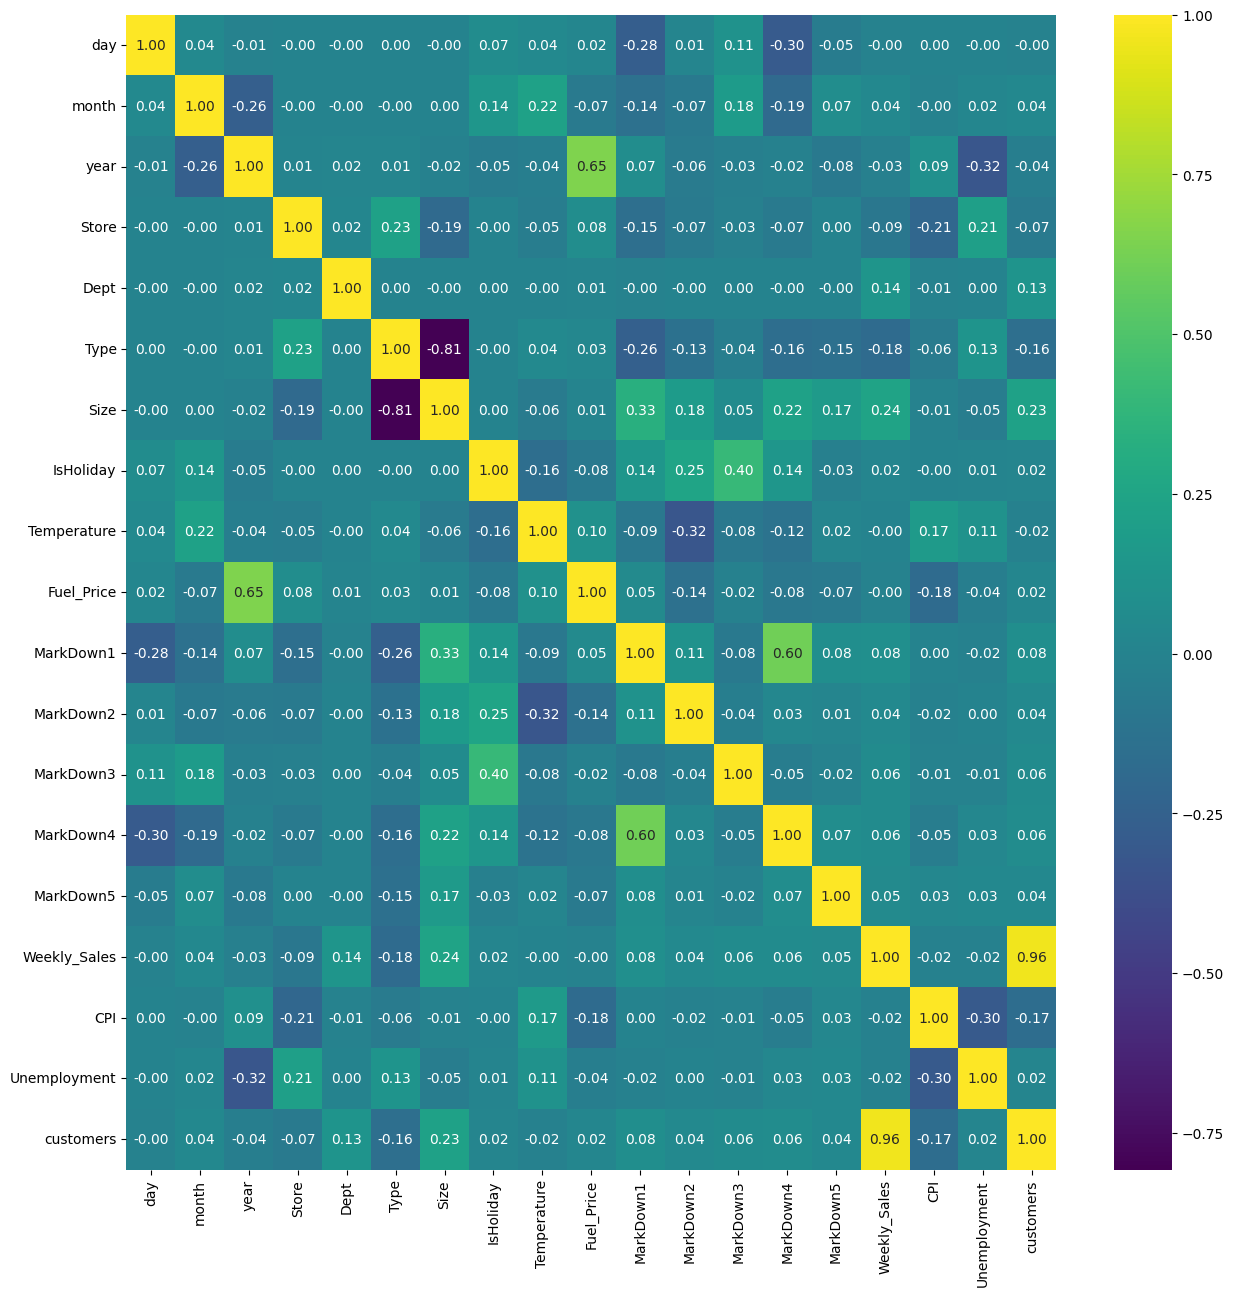

In [95]:
plt.figure(figsize=(15,15))
corr=df_md1.corr()
sns.heatmap(corr,cmap='viridis',annot=True,fmt='.2f')

**Size and Type:**

 There's a strong negative correlation between Size and Type. This suggests that stores with larger sizes tend to have different types.

**MarkDown4 and MarkDown5:** 

These two markdown variables have a high positive correlation, indicating that they often occur together.

**Weekly_Sales and customers:**

 A strong positive correlation exists between Weekly_Sales and customers, which is expected as higher sales generally lead to more customers.

**Unemployment and CPI:**

 There's a moderate negative correlation between Unemployment and CPI, which aligns with economic theory.



**Feature Selection Based on Correlation Matrix:**

Remove Highly Correlated Features:

As observed earlier, MarkDown4 and MarkDown5 have a strong positive correlation. To avoid multicollinearity issues, we can remove one of them. Let's arbitrarily remove MarkDown5.

**Select Features Correlated with Target Variable:**

The target variable is  Weekly_Sales.
Focus on features that have a moderate to strong correlation with Weekly_Sales:
Customers (strong positive correlation)
MarkDown1, MarkDown2, MarkDown3, MarkDown4 (moderate to weak correlations, but still potentially informative)
Temperature, Fuel_Price, CPI, and Unemployment (moderate correlations, but their impact might be less direct)

**Potential Predictions:**

*Predicting Weekly Sales:*

Features: Customers, MarkDown1, MarkDown2, MarkDown3, MarkDown4, Temperature, Fuel_Price, CPI, Unemployment, Size, Type (if deemed relevant after further analysis)
Model: Regression models such as Linear Regression, Random Forest Regression, Gradient Boosting Regression, or Support Vector Regression could be suitable.


*Predicting Customer Count:*

Features: Weekly_Sales, MarkDown1, MarkDown2, MarkDown3, MarkDown4, Temperature, Fuel_Price, CPI, Unemployment, Size, Type
Model: Regression models similar to those used for predicting Weekly_Sales.


*Predicting MarkDown Effectiveness:*

Features: Weekly_Sales, Customers, Temperature, Fuel_Price, CPI, Unemployment, Size, Type
Target Variable: Could be any of the MarkDown variables (e.g., MarkDown1)
Model: Regression model

**Predicting Weekly Sales:**

**Features:** Customers, MarkDown1, MarkDown2, MarkDown3, MarkDown4, Temperature, Fuel_Price, CPI, Unemployment, Size, Type 


**Model:** Regression models such as Linear Regression, Random Forest Regression, Gradient Boosting Regression, or Support Vector Regression could be suitable.

In [96]:
df_md1.columns

Index(['day', 'month', 'year', 'Store', 'Dept', 'Type', 'Size', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'Weekly_Sales', 'CPI', 'Unemployment',
       'customers'],
      dtype='object')

In [97]:
# Saving the dataframe
df_md1.to_csv("retale_sales_final.csv",index= False)

In [98]:
df=pd.read_csv(r'C:\Users\HP\Desktop\retail_sales_final\retale_sales_final.csv')

# weekly_sales predection

In [99]:
df_wks_predection=df[[ 'customers','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4','Temperature', 'Fuel_Price','Size','Type', 'Weekly_Sales']]

In [100]:
df_wks_predection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551479 entries, 0 to 551478
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customers     551479 non-null  float64
 1   MarkDown1     551479 non-null  float64
 2   MarkDown2     551479 non-null  float64
 3   MarkDown3     551479 non-null  float64
 4   MarkDown4     551479 non-null  float64
 5   Temperature   551479 non-null  float64
 6   Fuel_Price    551479 non-null  float64
 7   Size          551479 non-null  int64  
 8   Type          551479 non-null  int64  
 9   Weekly_Sales  551479 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 42.1 MB


finding best algorithm for weekly_sales predection

In [101]:
def algorithm(df,lable):
    x=df.drop(columns=[lable])
    y=df[lable]

    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

    #checking the ML models
    print(accuracy_score(x_train,x_test,y_train,y_test,DecisionTreeRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,RandomForestRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,AdaBoostRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,ExtraTreesRegressor))
    print(accuracy_score(x_train,x_test,y_train,y_test,GradientBoostingRegressor))




In [ ]:
algorithm(df_wks_predection,'Weekly_Sales')

decession tree works well

In [16]:
x=df_wks_predection.drop(columns=['Weekly_Sales'])
y=df_wks_predection['Weekly_Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print({'mean_squared_error':
       mse,'root_mean_squar_error':rmse,
       "mean_absolute_error":mae,
       'r2':r2})

{'mean_squared_error': 2413851.6580969095, 'root_mean_squar_error': np.float64(1553.6575099090885), 'mean_absolute_error': 239.03218949372595, 'r2': 0.9953482826878564}


**Cross-validation** is a powerful technique used in machine learning to assess the performance of a model on unseen data. It helps to prevent overfitting and provides a more reliable estimate of the model's generalization ability.

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Sample data
x=df_wks_predection.drop(columns=['Weekly_Sales'])
y=df_wks_predection['Weekly_Sales']

# Initialize the model
model = DecisionTreeRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.97816408 0.98532825 0.98402675 0.98131638 0.99088598]
Mean cross-validation score: 0.9839442864306255


In [21]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

parameters = {
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None],
}


gridsearch= GridSearchCV(estimator= DecisionTreeRegressor(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [22]:
# Get the best parameters
best_params = gridsearch.best_params_
print("Best parameters found:", best_params)

# Get the best score
best_score = gridsearch.best_score_
print("Best score achieved:", best_score)


Best parameters found: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best score achieved: 0.9959440017446122


In [104]:
x=df_wks_predection.drop(columns=['Weekly_Sales'])
y=df_wks_predection['Weekly_Sales']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

model=DecisionTreeRegressor(max_depth= 20, max_features= None, min_samples_leaf= 4, min_samples_split=10).fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print({'mean_squared_error':
       mse,'root_mean_squar_error':rmse,
       "mean_absolute_error":mae,
       'r2':r2})

{'mean_squared_error': 2329046.4531749375, 'root_mean_squar_error': np.float64(1526.1213756365964), 'mean_absolute_error': 247.86269168767384, 'r2': 0.9955123093205677}


In [24]:
df_wks_predection.head()

,customers,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Temperature,Fuel_Price,Size,Type,Weekly_Sales
0,118.071672,5124.1742,6431.0950,193.4683,25353.8550,42.31,2.572,151315,1,24924.50
1,217.946493,60301.6179,6431.0950,100.9448,11392.6982,38.51,2.548,151315,1,46039.49
2,196.865534,45160.2199,13405.4524,38.5579,11442.5694,39.93,2.514,151315,1,41595.55
3,91.820806,45143.7934,11699.6608,78.1551,2971.7171,46.63,2.561,151315,1,19403.54
4,103.278378,7012.5363,1606.0880,176.0688,24507.6180,46.50,2.625,151315,1,21827.90


In [107]:
model.predict([[217.946493,	60301.6179,	6431.0950,	100.9448,	11392.6982,	38.51	,2.548	,151315	,1]])

c:\Users\HP\Desktop\retail_sales_final\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([46137.20375])

In [108]:
#saving the model
with open("weely_sales_model.pkl","wb") as f:
  pickle.dump(model,f)

In [135]:
with open("weely_sales_model.pkl","rb") as f:
  model_ws=pickle.load(f)

In [136]:
model_ws.predict([[217.946493,	60301.6179,	6431.0950,	100.9448,	11392.6982,	38.51	,2.548	,151315	,1]])

c:\Users\HP\Desktop\retail_sales_final\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([46137.20375])

**Predicting Customer Count:**

**Features:** Weekly_Sales, MarkDown1, MarkDown2, MarkDown3, MarkDown4, Temperature, Fuel_Price, CPI, Unemployment, Size, Type


In [109]:
df.columns

Index(['day', 'month', 'year', 'Store', 'Dept', 'Type', 'Size', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'Weekly_Sales', 'CPI', 'Unemployment',
       'customers'],
      dtype='object')

In [113]:
df_cus_count=df[['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4','Temperature','Fuel_Price','CPI','Unemployment','Size','Type','customers']]

In [114]:
df_cus_count

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Temperature,Fuel_Price,CPI,Unemployment,Size,Type,customers
0,24924.5000,5434.6217,6385.8196,215.4063,25310.2763,42.31,2.572,211.096358,8.106,151315,1,118.071672
1,46039.4900,62153.0194,6385.8196,100.5171,12301.2332,38.51,2.548,211.242170,8.106,151315,1,217.946493
2,41595.5500,52003.5070,13603.1704,39.1898,10841.0228,39.93,2.514,211.289143,8.106,151315,1,196.865534
3,19403.5400,51956.3722,11753.3103,106.7520,2874.9480,46.63,2.561,211.319643,8.106,151315,1,91.820806
4,21827.9000,7401.3225,1489.1830,200.7960,23570.4099,46.50,2.625,211.350143,8.106,151315,1,103.278378
...,...,...,...,...,...,...,...,...,...,...,...,...
551474,3882.3269,212.0200,851.7300,2.0600,10.8800,76.06,3.804,193.343894,8.684,118221,2,20.079904
551475,57761.5789,212.0200,851.7300,2.0600,10.8800,76.06,3.804,193.343894,8.684,118221,2,298.750469
551476,18.7617,212.0200,851.7300,2.0600,10.8800,76.06,3.804,193.343894,8.684,118221,2,0.097038
551477,6650.9883,212.0200,851.7300,2.0600,10.8800,76.06,3.804,193.343894,8.684,118221,2,34.399785


In [72]:
algorithm(df_cus_count,'customers')

{'algorithm': <class 'sklearn.tree._classes.DecisionTreeRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9995774176728421}
{'algorithm': <class 'sklearn.ensemble._forest.RandomForestRegressor'>, 'R2_train': 0.9999520173547439, 'R2_test': 0.9998505982249105}
{'algorithm': <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>, 'R2_train': 0.753385210269529, 'R2_test': 0.7516050557886094}
{'algorithm': <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>, 'R2_train': 1.0, 'R2_test': 0.9999278517226837}
{'algorithm': <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>, 'R2_train': 0.9994232955796748, 'R2_test': 0.9992609219221983}


In [126]:
x=df_cus_count.drop(columns='customers')
y=df_cus_count['customers']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)


print({'mean_squared_error':mse,
       'rmse':rmse,
       'mean_absolute_error':mae,
       'r2':r2})





{'mean_squared_error': 7.771207782604538, 'rmse': np.float64(2.787688609332925), 'mean_absolute_error': 0.2797814625141977, 'r2': 0.9996339924730345}


In [132]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
x=df_cus_count.drop(columns='customers')
y=df_cus_count['customers']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

parameters = {
    "max_depth": [2, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt',  None],
}


gridsearch= GridSearchCV(estimator= DecisionTreeRegressor(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [137]:
# Get the best parameters
best_params = gridsearch.best_params_
print("Best parameters found:", best_params)

# Get the best score
best_score = gridsearch.best_score_
print("Best score achieved:", best_score)


Best parameters found: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score achieved: 0.98517396879836


In [128]:

from sklearn.model_selection import cross_val_score
# Sample data
x=df_cus_count.drop(columns='customers')
y=df_cus_count['customers']

# Initialize the model
model = DecisionTreeRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, x, y, cv=2, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.99764232 0.99945004]
Mean cross-validation score: 0.9985461841663779


In [139]:
x=df_cus_count.drop(columns=['customers'])
y=df_cus_count['customers']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

model_c=DecisionTreeRegressor(max_depth= 5, max_features= None, min_samples_leaf= 1, min_samples_split=2).fit(x_train,y_train)
y_pred=model_c.predict(x_test)

mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print({'mean_squared_error':
       mse,'root_mean_squar_error':rmse,
       "mean_absolute_error":mae,
       'r2':r2})

{'mean_squared_error': 346.252054235763, 'root_mean_squar_error': np.float64(18.607849264107955), 'mean_absolute_error': 8.332394410951155, 'r2': 0.9833035715160569}


In [141]:
df_cus_count.columns

Index(['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Type',
       'customers'],
      dtype='object')

In [144]:
df_cus_count.head()

,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,Temperature,Fuel_Price,CPI,Unemployment,Size,Type,customers
0,24924.50,5434.6217,6385.8196,215.4063,25310.2763,42.31,2.572,211.096358,8.106,151315,1,118.071672
1,46039.49,62153.0194,6385.8196,100.5171,12301.2332,38.51,2.548,211.242170,8.106,151315,1,217.946493
2,41595.55,52003.5070,13603.1704,39.1898,10841.0228,39.93,2.514,211.289143,8.106,151315,1,196.865534
3,19403.54,51956.3722,11753.3103,106.7520,2874.9480,46.63,2.561,211.319643,8.106,151315,1,91.820806
4,21827.90,7401.3225,1489.1830,200.7960,23570.4099,46.50,2.625,211.350143,8.106,151315,1,103.278378


In [ ]:
model_c.predict([[24924.50,	5434.6217,	6385.8196	,215.4063	,25310.2763,	42.31,	2.572,	211.096358	,8.106	,151315	,1]])

In [142]:
#saving the model
with open("Customer_count_model.pkl","wb") as f:
  pickle.dump(model_c,f)

In [143]:
with open("Customer_count_model.pkl","rb") as f:
  model_cus=pickle.load(f)

In [148]:
model_cus.predict([[19403.54	,51956.3722,	11753.3103	,106.7520	,2874.9480,	46.63	,2.561	,211.319643,	8.106	,151315	,1]])

c:\Users\HP\Desktop\retail_sales_final\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([95.54813982])